<a href="https://colab.research.google.com/github/A-Tetarwal/YouTube-Quick-Search/blob/main/Fibonacci_and_Elliot__Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed


300
successfully filter out candidate wave
134
successfully filter out candidate wave 12
63
successfully filter out candidate wave123
9
successfully filter out candidate wave1234
13
successfully filter out candidate wave12345


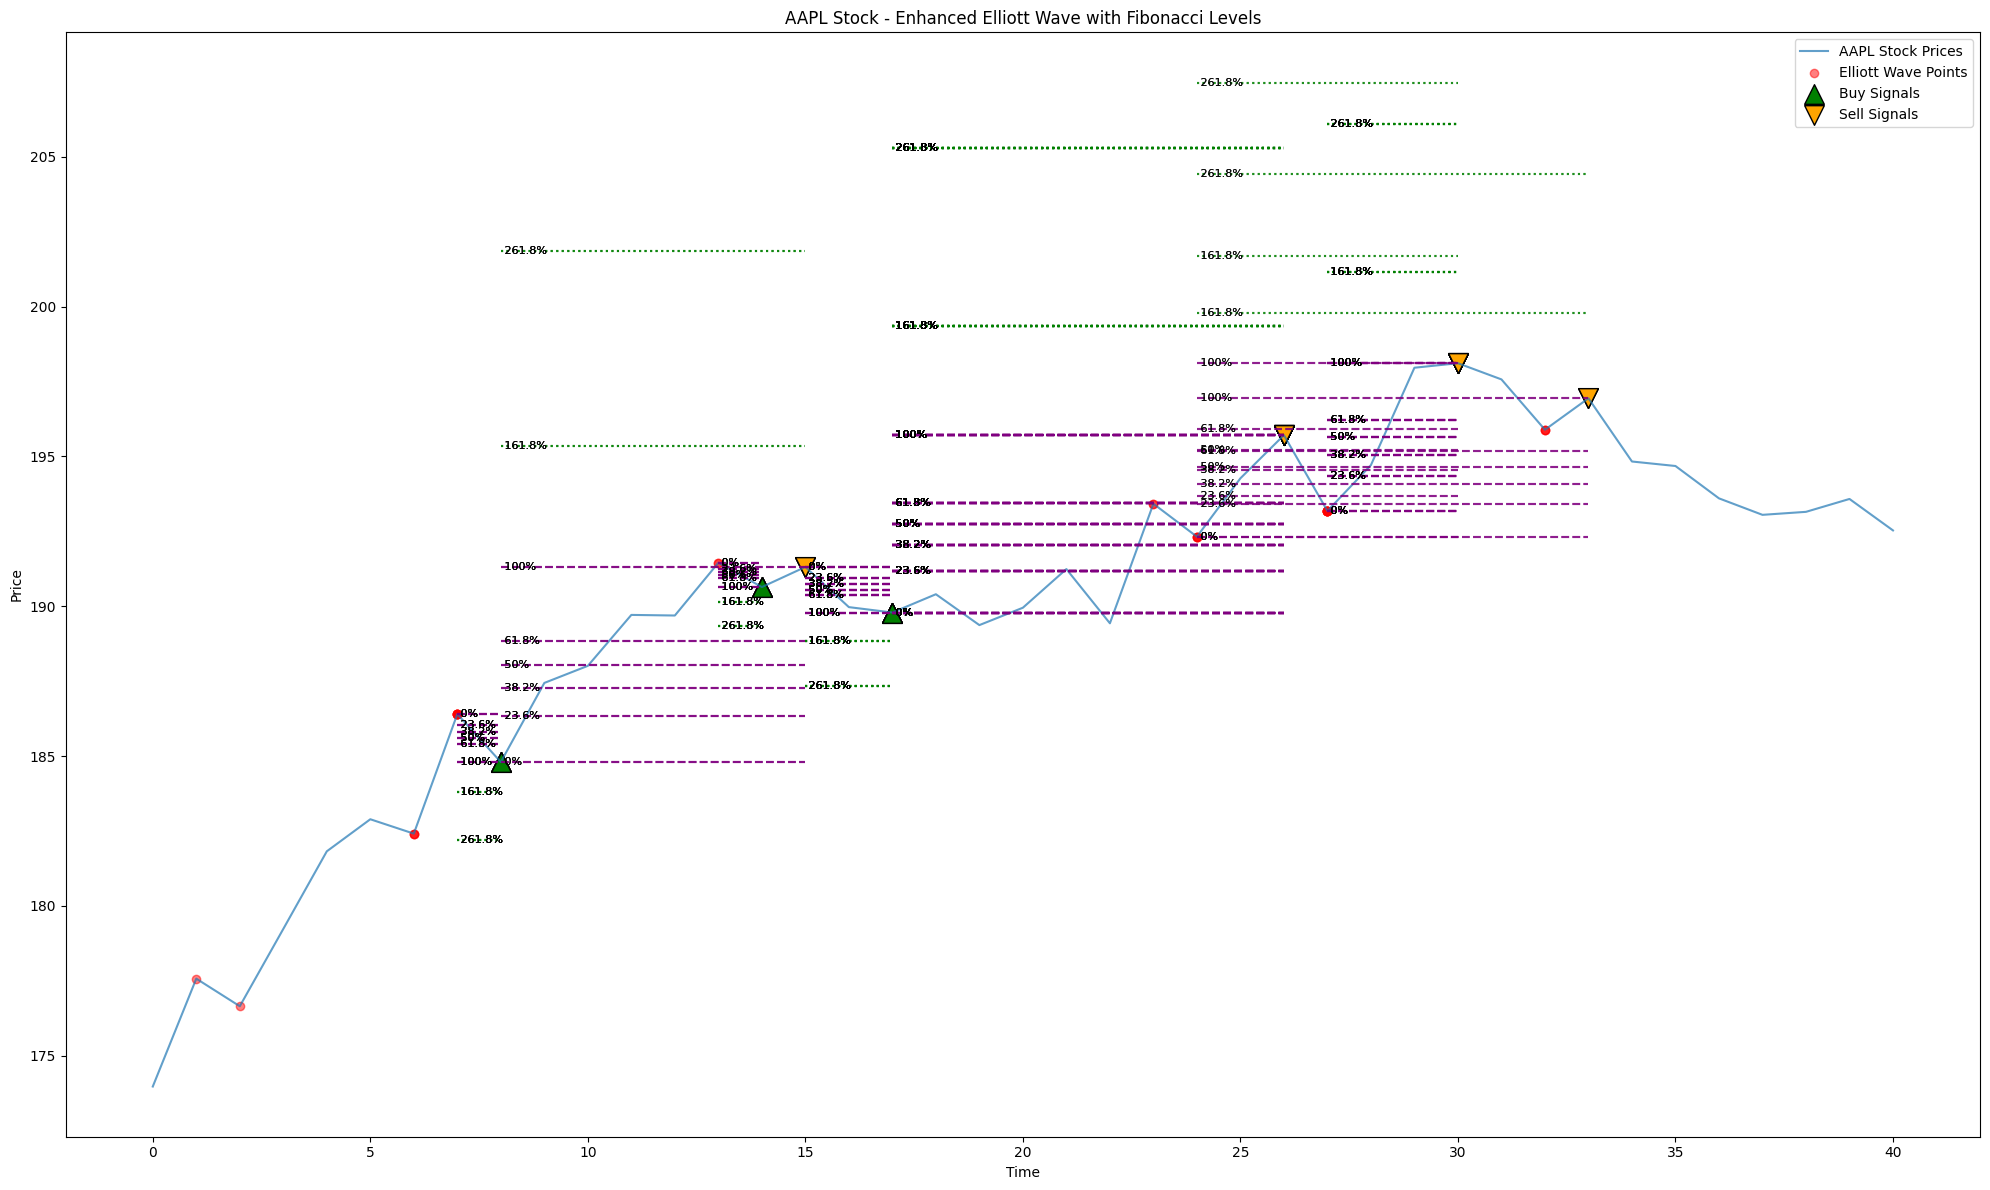

([184.8000030517578,
  184.8000030517578,
  189.7899932861328,
  189.7899932861328,
  189.7899932861328,
  190.63999938964844,
  190.63999938964844,
  184.8000030517578,
  184.8000030517578,
  189.7899932861328,
  189.7899932861328,
  189.7899932861328,
  190.63999938964844,
  190.63999938964844,
  184.8000030517578,
  184.8000030517578,
  189.7899932861328,
  189.7899932861328,
  189.7899932861328,
  190.63999938964844,
  190.63999938964844],
 [8,
  8,
  17,
  17,
  17,
  14,
  14,
  8,
  8,
  17,
  17,
  17,
  14,
  14,
  8,
  8,
  17,
  17,
  17,
  14,
  14],
 [191.30999755859375,
  191.30999755859375,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  195.7100067138672,
  198.11000061035156,
  196.94000244140625,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  195.7100067138672,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  195.7100067138672,
  191.30999755859375,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import taew
import yfinance as yfn
import pandas as pd

def enhanced_fibonacci_trading_signals(x_values, z_values, sensitivity=0.3, min_wave_length=3):
    """
    Enhanced function to identify more precise trading signals

    Args:
    x_values (list): Price values of waves
    z_values (list): Indices of waves
    sensitivity (float): Adjust sensitivity of signal detection
    min_wave_length (int): Minimum wave length to consider

    Returns:
    Detailed trading signals with more nuanced detection
    """
    buy_points = []
    buy_indices = []
    sell_points = []
    sell_indices = []
    fib_details = []

    # Smaller window sizes for more granular analysis
    window_sizes = [4, 5, 6]

    for window in window_sizes:
        for i in range(0, len(x_values) - window):
            points = x_values[i:i+window]
            indices = z_values[i:i+window]

            # Advanced Buy Signal Detection
            if len(points) >= 4:
                # More sophisticated wave pattern recognition
                wave1 = abs(points[1] - points[0])
                wave2 = abs(points[2] - points[1])
                wave3 = abs(points[3] - points[2])

                # Refined buy signal conditions
                buy_conditions = [
                    wave2 <= sensitivity * wave1,  # Smaller retracement
                    wave3 > wave2,  # Next wave shows recovery
                    wave1 > min_wave_length  # Minimum wave significance
                ]

                if all(buy_conditions):
                    buy_points.append(points[2])
                    buy_indices.append(indices[2])

                    # Calculate Fibonacci levels
                    fib_levels = calculate_fibonacci_levels(points[1], points[2])
                    fib_details.append({
                        'type': 'buy',
                        'start_index': indices[1],
                        'end_index': indices[2],
                        'start_price': points[1],
                        'end_price': points[2],
                        'fibonacci': fib_levels
                    })

            # Advanced Sell Signal Detection
            if len(points) >= window:
                wave1 = abs(points[-1] - points[-2])
                wave_prior = abs(points[-2] - points[-3])

                # Refined sell signal conditions
                sell_conditions = [
                    wave1 >= 1.5 * wave_prior,  # Significant price movement
                    wave1 > min_wave_length,  # Minimum wave significance
                    points[-1] > points[-3]  # Overall upward trend
                ]

                if all(sell_conditions):
                    sell_points.append(points[-1])
                    sell_indices.append(indices[-1])

                    # Calculate Fibonacci levels
                    fib_levels = calculate_fibonacci_levels(points[-2], points[-1])
                    fib_details.append({
                        'type': 'sell',
                        'start_index': indices[-2],
                        'end_index': indices[-1],
                        'start_price': points[-2],
                        'end_price': points[-1],
                        'fibonacci': fib_levels
                    })

    return buy_points, buy_indices, sell_points, sell_indices, fib_details

# Existing functions from original script
def calculate_fibonacci_levels(start_price, end_price):
    """
    Calculate Fibonacci retracement and extension levels

    Args:
    start_price (float): Starting price of the wave
    end_price (float): Ending price of the wave

    Returns:
    dict: Fibonacci retracement and extension levels
    """
    is_uptrend = start_price < end_price

    retracement_levels = {
        '0%': start_price,
        '23.6%': start_price + 0.236 * (end_price - start_price),
        '38.2%': start_price + 0.382 * (end_price - start_price),
        '50%': start_price + 0.5 * (end_price - start_price),
        '61.8%': start_price + 0.618 * (end_price - start_price),
        '100%': end_price
    }

    extension_levels = {
        '161.8%': start_price + 1.618 * (end_price - start_price),
        '261.8%': start_price + 2.618 * (end_price - start_price)
    }

    return {
        'retracement': retracement_levels,
        'extension': extension_levels
    }

def analyze_stock_data(ticker, start_date, end_date, sensitivity=0.3):
    """
    Comprehensive stock data analysis function

    Args:
    ticker (str): Stock ticker symbol
    start_date (str): Analysis start date
    end_date (str): Analysis end date
    sensitivity (float): Signal detection sensitivity

    Returns:
    Comprehensive analysis results
    """
    # Fetch stock data
    stock_data = yfn.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data['Close'].dropna()

    # Convert to numpy array
    prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')

    # Identify Elliott Waves
    waves = taew.Alternative_ElliottWave_label_upward(prices)

    # Extract x and z values from identified waves
    x_values = [wave['x'] for wave in waves]
    z_values = [wave['z'] for wave in waves]

    # Flatten lists to work with signal detection
    x_values = [item for sublist in x_values for item in sublist]
    z_values = [item for sublist in z_values for item in sublist]

    # Get trading signals and Fibonacci details
    buy_points, buy_indices, sell_points, sell_indices, fib_details = enhanced_fibonacci_trading_signals(
        x_values, z_values, sensitivity=sensitivity
    )

    # Visualization
    plt.figure(figsize=(20,12))
    plt.plot(prices, label=f'{ticker} Stock Prices', alpha=0.7)

    # Plot Fibonacci Levels for Buy and Sell Points
    for fib in fib_details:
        start_index = fib['start_index']
        end_index = fib['end_index']

        # Retracement Levels
        for level_name, level_price in fib['fibonacci']['retracement'].items():
            plt.hlines(y=level_price, xmin=start_index, xmax=end_index,
                       colors='purple', linestyles='dashed', alpha=0.5)
            plt.text(start_index, level_price, f' {level_name}',
                     verticalalignment='center', alpha=0.7, fontsize=8)

        # Extension Levels
        for level_name, level_price in fib['fibonacci']['extension'].items():
            plt.hlines(y=level_price, xmin=start_index, xmax=end_index,
                       colors='green', linestyles='dotted', alpha=0.5)
            plt.text(start_index, level_price, f' {level_name}',
                     verticalalignment='center', alpha=0.7, fontsize=8)

    plt.scatter(z_values, x_values, color='red', label='Elliott Wave Points', alpha=0.5)
    plt.scatter(buy_indices, buy_points, color='green', label='Buy Signals',
                marker='^', s=200, edgecolors='black')
    plt.scatter(sell_indices, sell_points, color='orange', label='Sell Signals',
                marker='v', s=200, edgecolors='black')

    plt.title(f'{ticker} Stock - Enhanced Elliott Wave with Fibonacci Levels')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

    return buy_points, buy_indices, sell_points, sell_indices, fib_details

# Example usage for shorter time periods
analyze_stock_data('AAPL', '2023-11-01', '2023-12-31', sensitivity=0.2)


[*********************100%***********************]  1 of 1 completed


300
successfully filter out candidate wave
134
successfully filter out candidate wave 12
63
successfully filter out candidate wave123
9
successfully filter out candidate wave1234
13
successfully filter out candidate wave12345


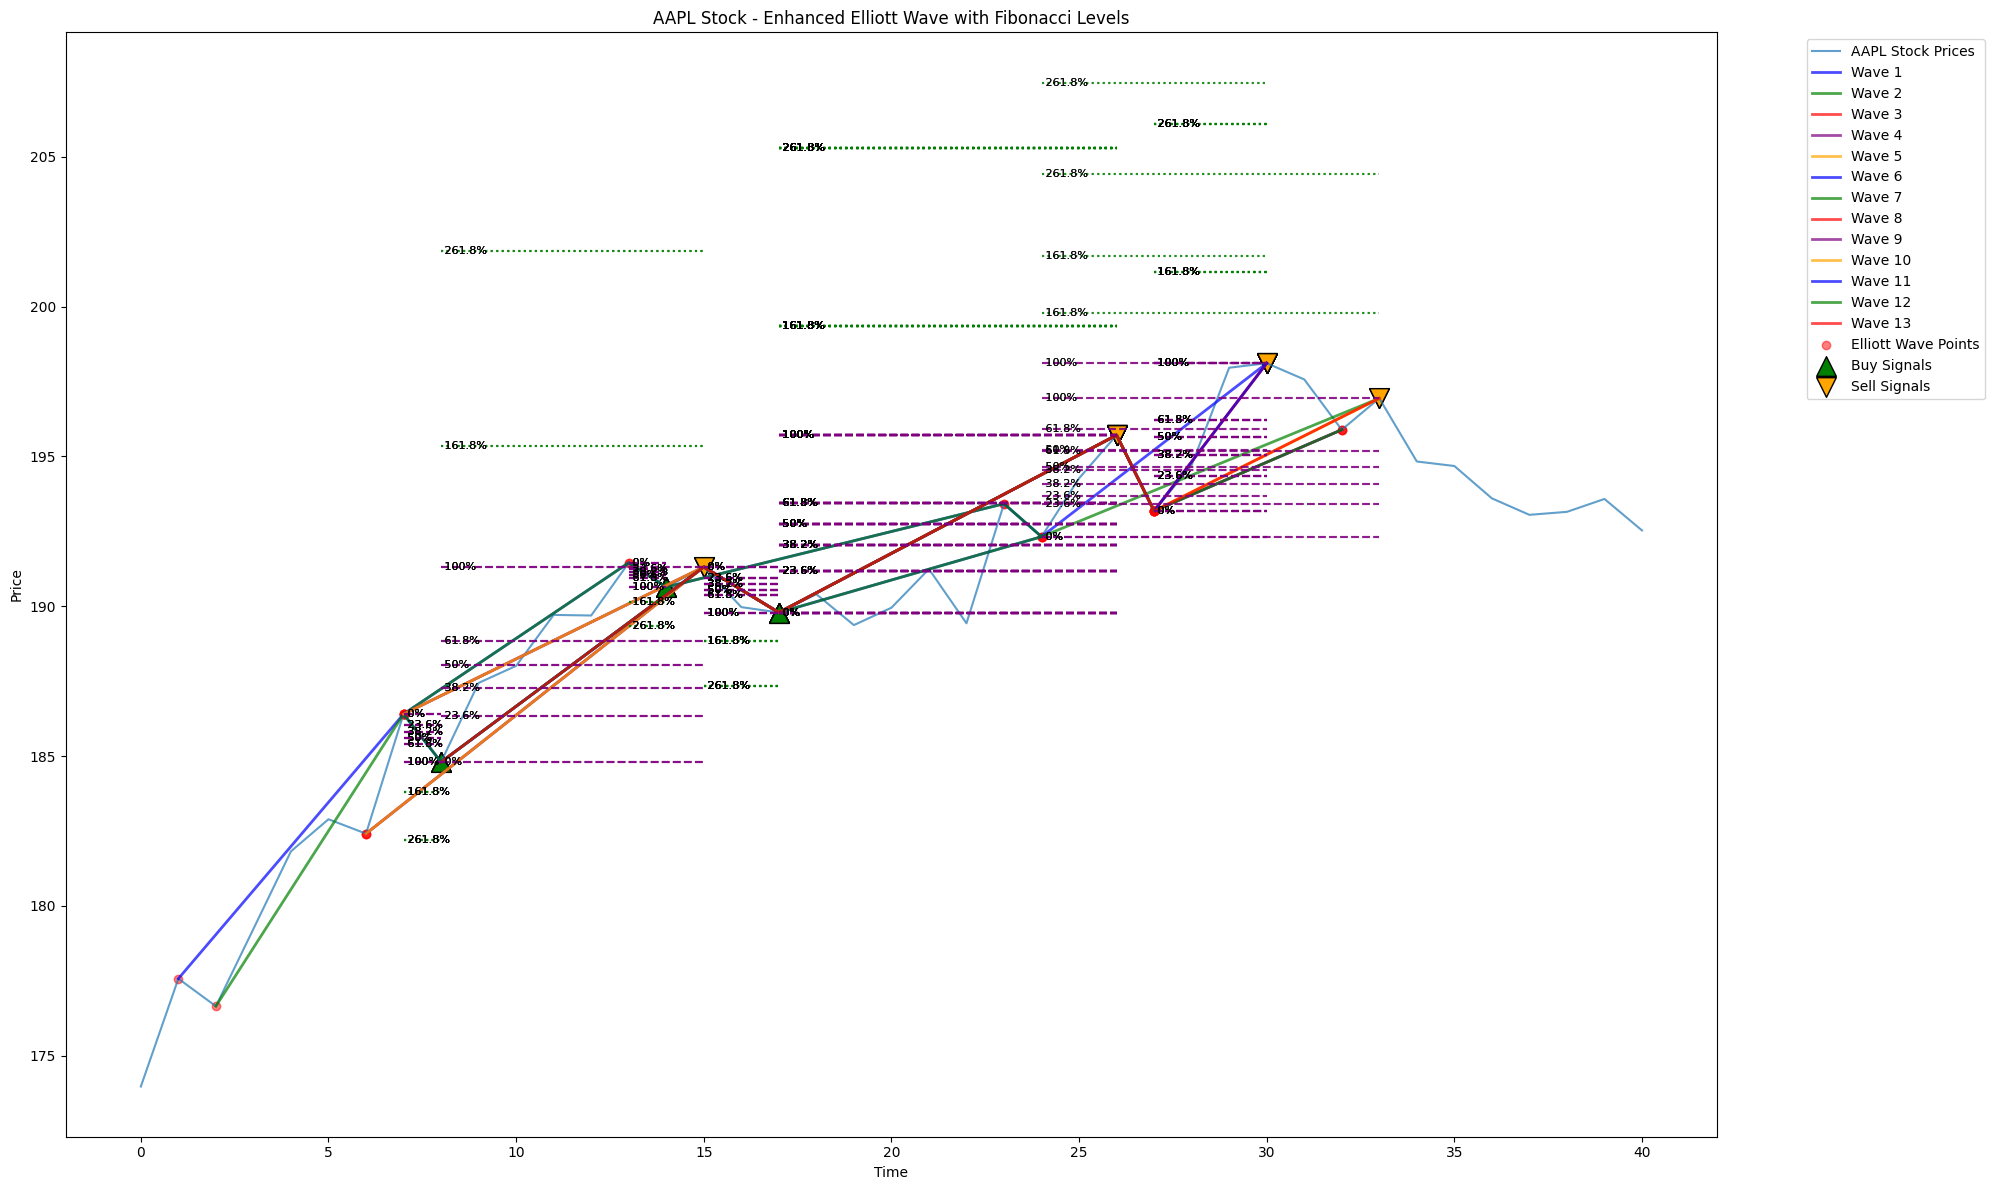

([184.8000030517578,
  184.8000030517578,
  189.7899932861328,
  189.7899932861328,
  189.7899932861328,
  190.63999938964844,
  190.63999938964844,
  184.8000030517578,
  184.8000030517578,
  189.7899932861328,
  189.7899932861328,
  189.7899932861328,
  190.63999938964844,
  190.63999938964844,
  184.8000030517578,
  184.8000030517578,
  189.7899932861328,
  189.7899932861328,
  189.7899932861328,
  190.63999938964844,
  190.63999938964844],
 [8,
  8,
  17,
  17,
  17,
  14,
  14,
  8,
  8,
  17,
  17,
  17,
  14,
  14,
  8,
  8,
  17,
  17,
  17,
  14,
  14],
 [191.30999755859375,
  191.30999755859375,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  195.7100067138672,
  198.11000061035156,
  196.94000244140625,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  195.7100067138672,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  195.7100067138672,
  191.30999755859375,
  195.7100067138672,
  198.11000061035156,
  195.7100067138672,
  

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import taew
import yfinance as yfn
import pandas as pd

def enhanced_fibonacci_trading_signals(x_values, z_values, sensitivity=0.3, min_wave_length=3):
    """
    Enhanced function to identify more precise trading signals

    Args:
    x_values (list): Price values of waves
    z_values (list): Indices of waves
    sensitivity (float): Adjust sensitivity of signal detection
    min_wave_length (int): Minimum wave length to consider

    Returns:
    Detailed trading signals with more nuanced detection
    """
    buy_points = []
    buy_indices = []
    sell_points = []
    sell_indices = []
    fib_details = []

    # Smaller window sizes for more granular analysis
    window_sizes = [4, 5, 6]

    for window in window_sizes:
        for i in range(0, len(x_values) - window):
            points = x_values[i:i+window]
            indices = z_values[i:i+window]

            # Advanced Buy Signal Detection
            if len(points) >= 4:
                # More sophisticated wave pattern recognition
                wave1 = abs(points[1] - points[0])
                wave2 = abs(points[2] - points[1])
                wave3 = abs(points[3] - points[2])

                # Refined buy signal conditions
                buy_conditions = [
                    wave2 <= sensitivity * wave1,  # Smaller retracement
                    wave3 > wave2,  # Next wave shows recovery
                    wave1 > min_wave_length  # Minimum wave significance
                ]

                if all(buy_conditions):
                    buy_points.append(points[2])
                    buy_indices.append(indices[2])

                    # Calculate Fibonacci levels
                    fib_levels = calculate_fibonacci_levels(points[1], points[2])
                    fib_details.append({
                        'type': 'buy',
                        'start_index': indices[1],
                        'end_index': indices[2],
                        'start_price': points[1],
                        'end_price': points[2],
                        'fibonacci': fib_levels
                    })

            # Advanced Sell Signal Detection
            if len(points) >= window:
                wave1 = abs(points[-1] - points[-2])
                wave_prior = abs(points[-2] - points[-3])

                # Refined sell signal conditions
                sell_conditions = [
                    wave1 >= 1.5 * wave_prior,  # Significant price movement
                    wave1 > min_wave_length,  # Minimum wave significance
                    points[-1] > points[-3]  # Overall upward trend
                ]

                if all(sell_conditions):
                    sell_points.append(points[-1])
                    sell_indices.append(indices[-1])

                    # Calculate Fibonacci levels
                    fib_levels = calculate_fibonacci_levels(points[-2], points[-1])
                    fib_details.append({
                        'type': 'sell',
                        'start_index': indices[-2],
                        'end_index': indices[-1],
                        'start_price': points[-2],
                        'end_price': points[-1],
                        'fibonacci': fib_levels
                    })

    return buy_points, buy_indices, sell_points, sell_indices, fib_details

def calculate_fibonacci_levels(start_price, end_price):
    """
    Calculate Fibonacci retracement and extension levels

    Args:
    start_price (float): Starting price of the wave
    end_price (float): Ending price of the wave

    Returns:
    dict: Fibonacci retracement and extension levels
    """
    is_uptrend = start_price < end_price

    retracement_levels = {
        '0%': start_price,
        '23.6%': start_price + 0.236 * (end_price - start_price),
        '38.2%': start_price + 0.382 * (end_price - start_price),
        '50%': start_price + 0.5 * (end_price - start_price),
        '61.8%': start_price + 0.618 * (end_price - start_price),
        '100%': end_price
    }

    extension_levels = {
        '161.8%': start_price + 1.618 * (end_price - start_price),
        '261.8%': start_price + 2.618 * (end_price - start_price)
    }

    return {
        'retracement': retracement_levels,
        'extension': extension_levels
    }

def analyze_stock_data(ticker, start_date, end_date, sensitivity=0.3):
    """
    Comprehensive stock data analysis function

    Args:
    ticker (str): Stock ticker symbol
    start_date (str): Analysis start date
    end_date (str): Analysis end date
    sensitivity (float): Signal detection sensitivity

    Returns:
    Comprehensive analysis results
    """
    # Fetch stock data
    stock_data = yfn.download(ticker, start=start_date, end=end_date)
    stock_data = stock_data['Close'].dropna()

    # Convert to numpy array
    prices = np.array(stock_data.values, dtype=np.double).flatten(order='C')

    # Identify Elliott Waves
    waves = taew.Alternative_ElliottWave_label_upward(prices)

    # Extract x and z values from identified waves
    x_values = [wave['x'] for wave in waves]
    z_values = [wave['z'] for wave in waves]

    # Flatten lists to work with signal detection
    x_values_flat = [item for sublist in x_values for item in sublist]
    z_values_flat = [item for sublist in z_values for item in sublist]

    # Get trading signals and Fibonacci details
    buy_points, buy_indices, sell_points, sell_indices, fib_details = enhanced_fibonacci_trading_signals(
        x_values_flat, z_values_flat, sensitivity=sensitivity
    )

    # Visualization
    plt.figure(figsize=(20,12))
    plt.plot(prices, label=f'{ticker} Stock Prices', alpha=0.7)

    # Plot Elliott Wave Lines
    wave_colors = ['blue', 'green', 'red', 'purple', 'orange']
    for i, (x_wave, z_wave) in enumerate(zip(x_values, z_values)):
        color = wave_colors[i % len(wave_colors)]
        plt.plot(z_wave, x_wave, color=color, label=f'Wave {i+1}', linewidth=2, alpha=0.7)

    # Plot Fibonacci Levels for Buy and Sell Points
    for fib in fib_details:
        start_index = fib['start_index']
        end_index = fib['end_index']

        # Retracement Levels
        for level_name, level_price in fib['fibonacci']['retracement'].items():
            plt.hlines(y=level_price, xmin=start_index, xmax=end_index,
                       colors='purple', linestyles='dashed', alpha=0.5)
            plt.text(start_index, level_price, f' {level_name}',
                     verticalalignment='center', alpha=0.7, fontsize=8)

        # Extension Levels
        for level_name, level_price in fib['fibonacci']['extension'].items():
            plt.hlines(y=level_price, xmin=start_index, xmax=end_index,
                       colors='green', linestyles='dotted', alpha=0.5)
            plt.text(start_index, level_price, f' {level_name}',
                     verticalalignment='center', alpha=0.7, fontsize=8)

    plt.scatter(z_values_flat, x_values_flat, color='red', label='Elliott Wave Points', alpha=0.5)
    plt.scatter(buy_indices, buy_points, color='green', label='Buy Signals',
                marker='^', s=200, edgecolors='black')
    plt.scatter(sell_indices, sell_points, color='orange', label='Sell Signals',
                marker='v', s=200, edgecolors='black')

    plt.title(f'{ticker} Stock - Enhanced Elliott Wave with Fibonacci Levels')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return buy_points, buy_indices, sell_points, sell_indices, fib_details

# Example usage for shorter time periods
analyze_stock_data('AAPL', '2023-11-01', '2023-12-31', sensitivity=0.2)